## EDA

This section contains an exploratory data analysis on the dataset. This will allow to to have a more clean view of the source data features dynamics over time and to spot possible patterns in data, if any.

Data are provided in a straight order pandas dataframe (first record first).

#### ***IBM*** data:

Newest data available:

In [14]:
df_ibm.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-25,123.370003,124.349998,122.339996,122.470001,122.470001,5691800
2021-02-26,122.250000,122.250000,118.879997,118.930000,118.930000,9044900
2021-03-01,120.349998,122.320000,119.860001,120.739998,120.739998,5714500
2021-03-02,120.739998,121.900002,120.260002,120.330002,120.330002,4522200
2021-03-03,120.500000,122.629997,119.980003,122.360001,122.360001,7396200


Oldest data available:

In [15]:
df_yf_ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500


#### ***Apple Inc.*** data:

Newest data available:

In [16]:
df_yf_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-25,124.680000,126.459999,120.540001,120.989998,120.989998,148199500
2021-02-26,122.589996,124.849998,121.199997,121.260002,121.260002,164320000
2021-03-01,123.750000,127.930000,122.790001,127.790001,127.790001,115998300
2021-03-02,128.410004,128.720001,125.010002,125.120003,125.120003,102015300
2021-03-03,124.809998,125.709999,121.839996,122.059998,122.059998,112430400


Oldest data available:

In [17]:
df_yf_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600


#### ***Amazon.com Inc.*** data:

Newest data available:

In [18]:
df_yf_amzn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-25,3136.739990,3178.260010,3047.760010,3057.159912,3057.159912,4533800
2021-02-26,3095.199951,3122.439941,3036.699951,3092.929932,3092.929932,4273500
2021-03-01,3127.889893,3149.560059,3097.989990,3146.139893,3146.139893,2729100
2021-03-02,3143.469971,3163.520020,3087.120117,3094.530029,3094.530029,2590000
2021-03-03,3081.179932,3107.780029,2995.000000,3005.000000,3005.000000,3967200


Oldest data available:

In [19]:
df_yf_amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


#### ***Alphabet Inc.*** data:

Newest data available:

In [20]:
df_yf_googl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-25,2055.929932,2083.00000,2006.489990,2015.949951,2015.949951,2077400
2021-02-26,2029.949951,2056.52002,2001.010010,2021.910034,2021.910034,2001500
2021-03-01,2048.000000,2076.22998,2034.420044,2069.659912,2069.659912,1303000
2021-03-02,2064.840088,2094.73999,2056.669922,2064.479980,2064.479980,1277500
2021-03-03,2051.949951,2075.98999,1994.000000,2011.410034,2011.410034,1692200


Oldest data available:

In [21]:
df_yf_googl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


## Data visualization

Some data visualization will help to spot data dynamics.

In [22]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

Stock volume history of IBM stock:

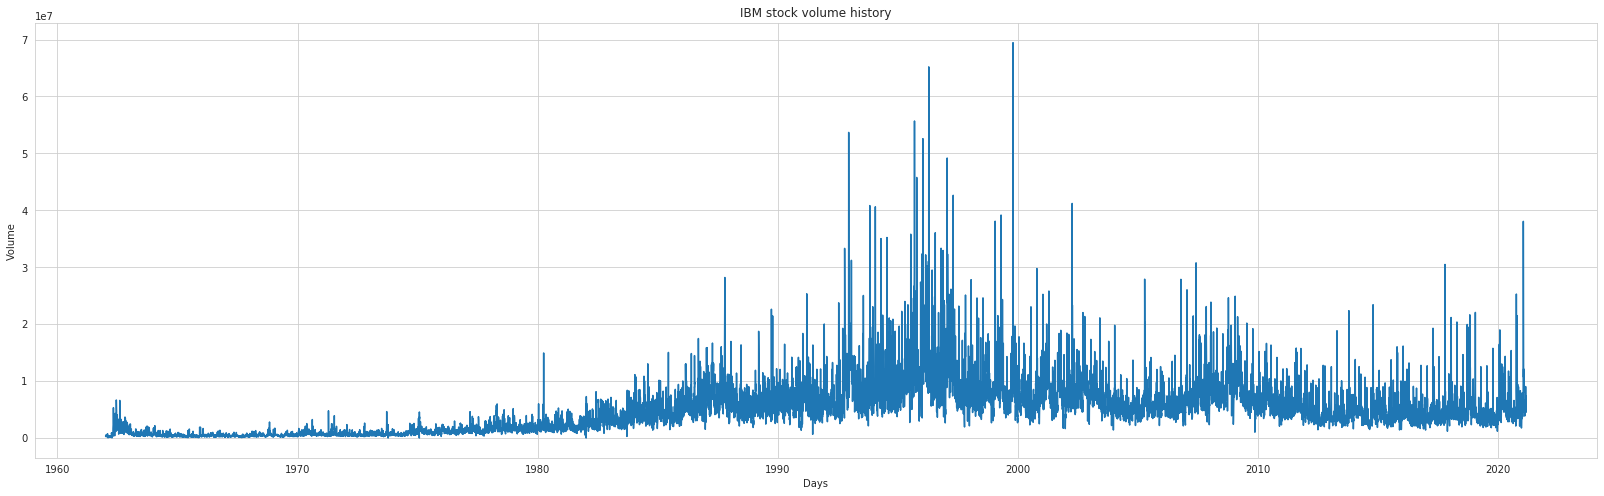

In [23]:
plt.figure(figsize=(28, 8))
plt.plot(df_ibm["Volume"])
plt.title('IBM stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [24]:
print("checking if any null values are present\n", df_ibm.isna().sum())

checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [25]:
print("checking if any null values are present\n", df_aapl.isna().sum())

checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [26]:
print("checking if any null values are present\n", df_amzn.isna().sum())

checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [27]:
print("checking if any null values are present\n", df_googl.isna().sum())

checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### ***IBM*** data:

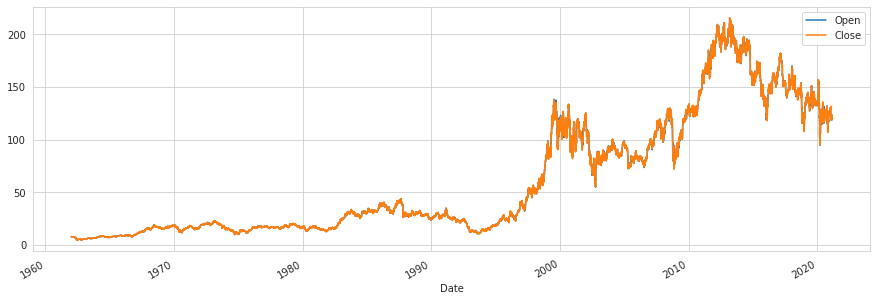

In [28]:
df_ibm[['Open', 'Close']].plot(legend=True,figsize=(15,5))

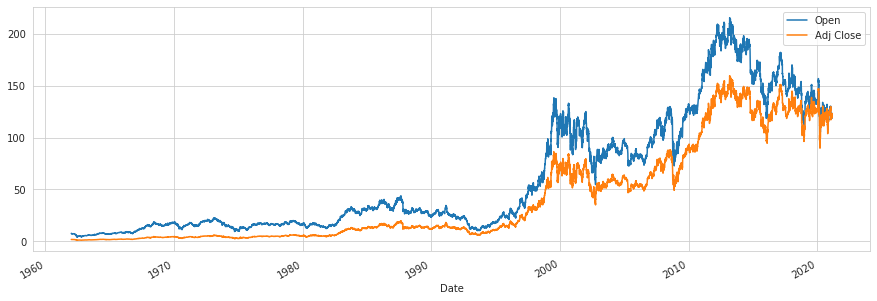

In [29]:
df_ibm[['Open', 'Adj Close']].plot(legend=True,figsize=(15,5))

Checking for inter-features correlation:

In [30]:
# Compute the correlation matrix
df_ibm_corr = df_ibm.corr()

In [31]:
import numpy as np

In [32]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_ibm_corr, dtype=bool))

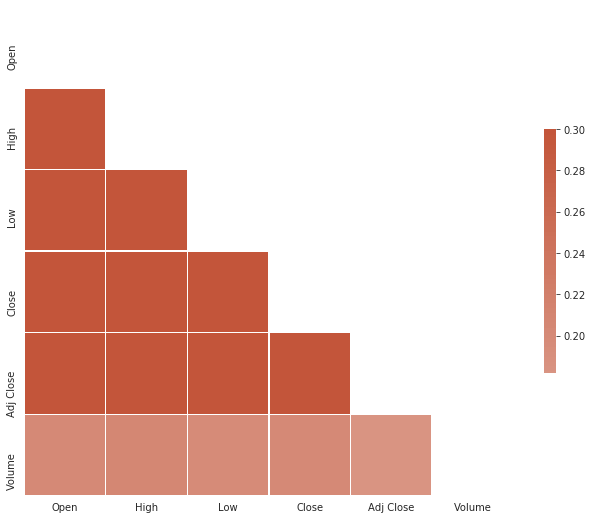

In [33]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_ibm_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Nominally, the Volume feature has a lower correlation with the other feature but, indeed, we can presume it contains very useful data, from the moment that we know that Open, High, Low and Close value are all mostly linearly correlated to Adj Close value (our target feature).

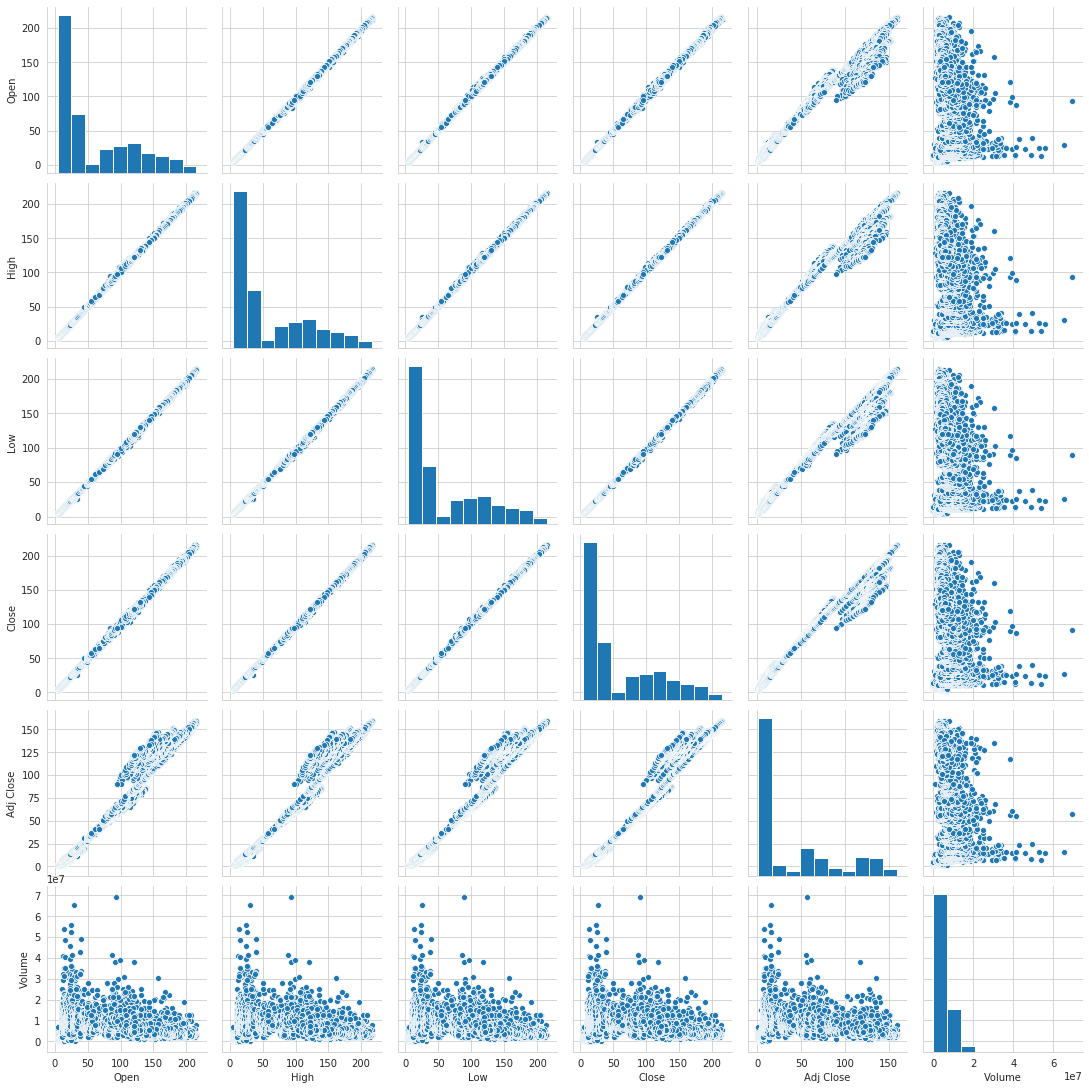

In [34]:
sns.pairplot(df_ibm)

From what we can see in the pairplot, we can expect the volume to be pretty high when the value of the stock is low and to get lower when the value of the stock is high.
We can run an additional visual check on this hypotesis:

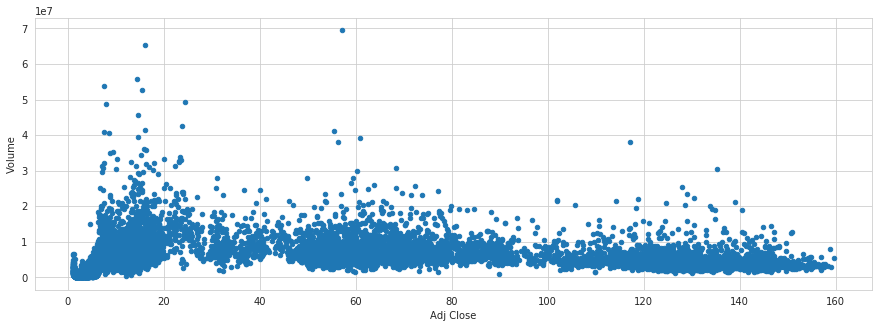

In [35]:
df_ibm.plot.scatter('Adj Close', 'Volume', legend=True, figsize=(15, 5))

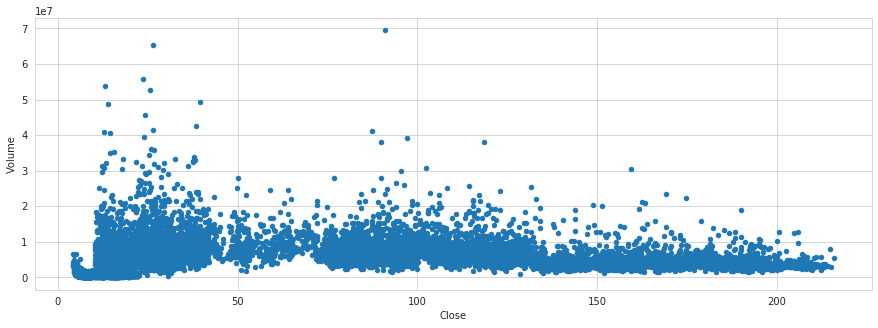

In [36]:
df_ibm.plot.scatter('Close', 'Volume', legend=True, figsize=(15, 5))

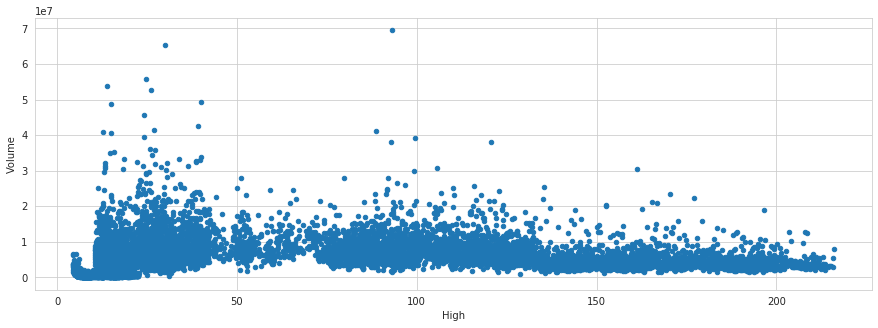

In [37]:
df_ibm.plot.scatter('High', 'Volume', legend=True, figsize=(15, 5))

More generally, it seems like specific values of the stock is realated to specific volume amount... Let's check another couple of stocks to see if this is a general beahvior in this kind of stock:

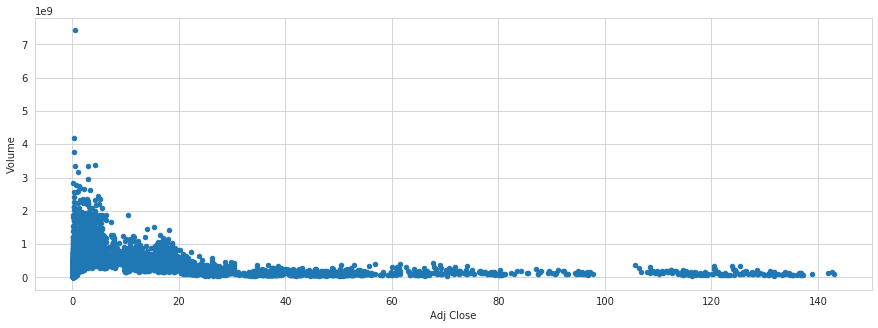

In [38]:
df_aapl.plot.scatter('Adj Close', 'Volume', legend=True, figsize=(15, 5))

**Apple Inc.** stock volume is even more related to Adjusted Close value. 

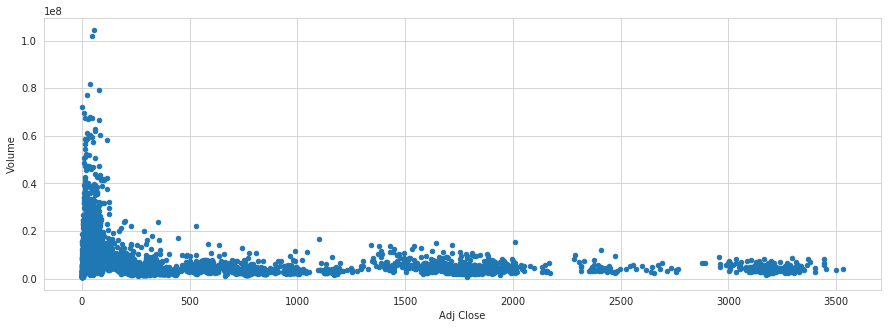

In [39]:
df_amzn.plot.scatter('Adj Close', 'Volume', legend=True, figsize=(15, 5))

**Amazon.com** stock too shows this behavior...

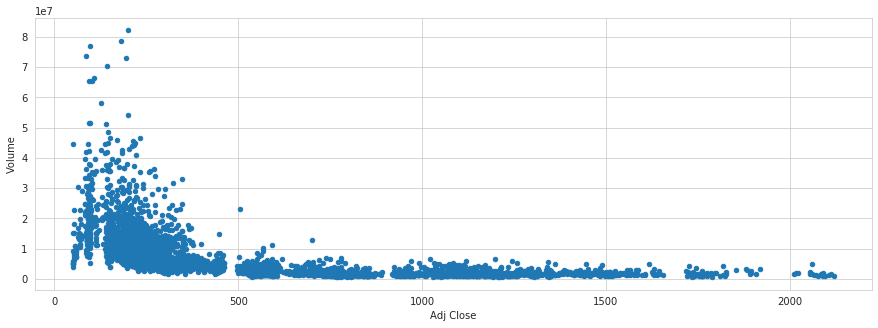

In [40]:
df_googl.plot.scatter('Adj Close', 'Volume', legend=True, figsize=(15, 5))

**Alphabet** stocks behavior confirms that.

#### ***Apple Inc.*** data:

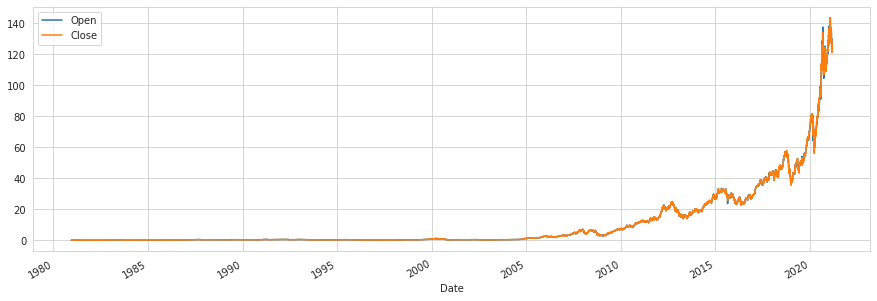

In [41]:
df_aapl[['Open', 'Close']].plot(legend=True,figsize=(15,5))

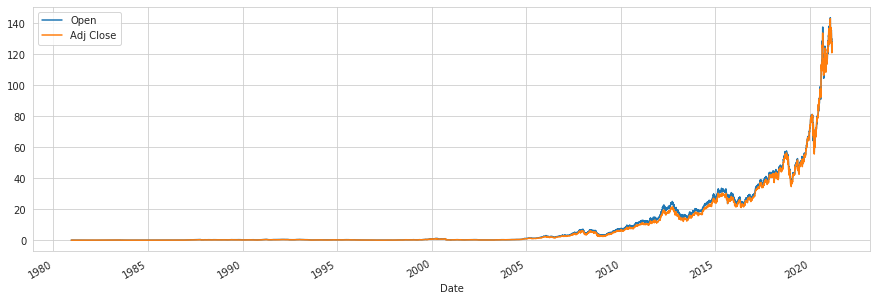

In [42]:
df_aapl[['Open', 'Adj Close']].plot(legend=True,figsize=(15,5))

Checking for inter-features correlation:

In [43]:
# Compute the correlation matrix
df_aapl_corr = df_aapl.corr()

In [44]:
import numpy as np

In [45]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_aapl_corr, dtype=bool))

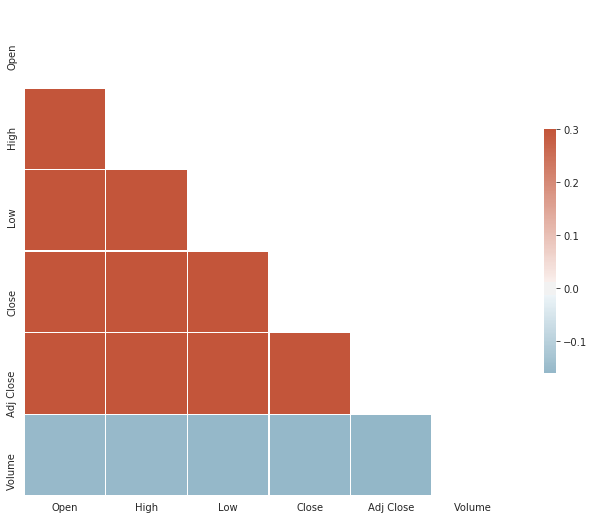

In [46]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_aapl_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

"Volume" feature has a lower correlation with the other features here we can clearly spot the expected correlation as hypotized about IBM stock.

### Seasonal pattern hypotesis on IBM stock

My hypotesis is that IBM can have an annual pattern, from september to october.
Let's run a more precise visual check:

1999-2000 period:

In [47]:
start_date = '1999-08-1'
end_date = '2000-11-30'

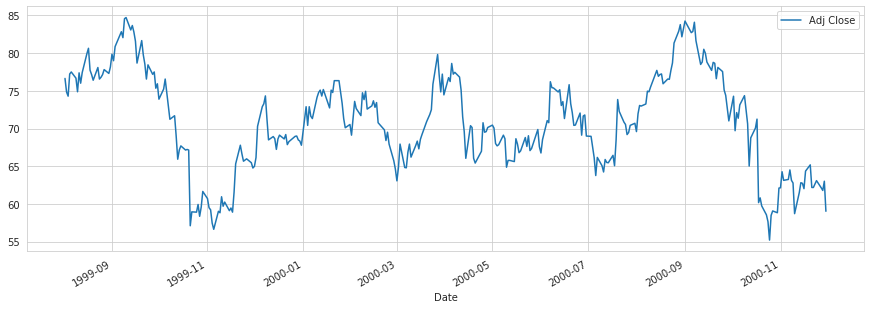

In [48]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

2000-2001 period:

In [49]:
start_date = '2000-08-1'
end_date = '2001-11-30'

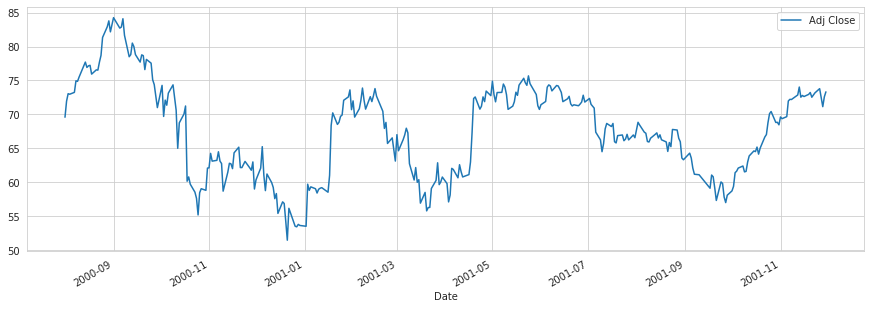

In [50]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

This seems to confirm my theory.

2001-2002 period:

In [51]:
start_date = '2001-08-1'
end_date = '2002-11-30'

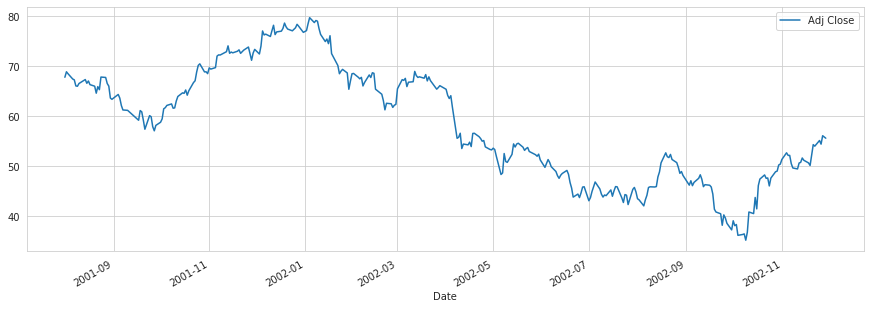

In [52]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

Looking to this one, I'm not sure that this applies to all periods. So, I will just analyze the last three years

In [53]:
start_date = '2019-08-1'
end_date = '2020-11-30'

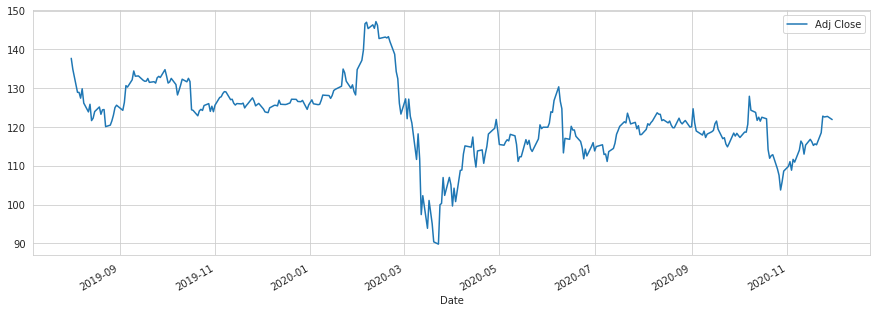

In [54]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

In [55]:
start_date = '2018-08-1'
end_date = '2019-11-30'

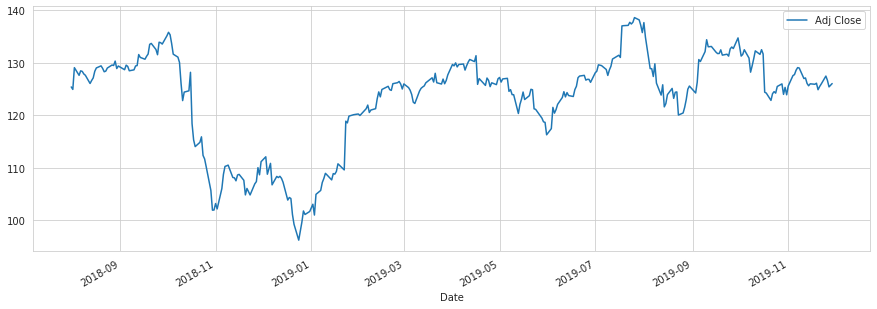

In [56]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

In [57]:
start_date = '2017-08-1'
end_date = '2018-11-30'

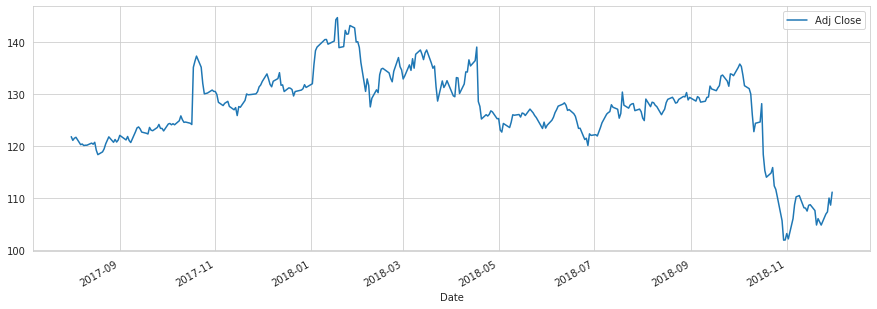

In [58]:
df_ibm[start_date:end_date][['Adj Close']].plot(legend=True,figsize=(15,5))

Looking at these data, it seems quite present, but is not so evident anymore.

### Conclusions about seasonality patterns

No clear seasonal pattern could be presumed in all the data.
All stocks as some kind of vague annual seasonality. Further investigation could be conducted later, but for now, we will not use any of this values to define context legnth and prediction length.